## PROJECT ANALYZING DATA FROM CIA FACTBOOK DATABASE

### Importing Modules

In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Making Connection to the Factbook Database

In [30]:
conn = sqlite3.connect('factbook.db')

In [31]:
cursor = conn.cursor()

### Querying to See List of Tables

In [32]:
query = "SELECT * FROM sqlite_master WHERE type='table'"

In [33]:
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


### Querying to See Configuration of Facts Table

In [34]:
query = "PRAGMA TABLE_INFO(facts)"
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,1,None,1
1,1,code,varchar(255),1,None,0
2,2,name,varchar(255),1,None,0
3,3,area,integer,0,None,0
4,4,area_land,integer,0,None,0
5,5,area_water,integer,0,None,0
6,6,population,integer,0,None,0
7,7,population_growth,float,0,None,0
8,8,birth_rate,float,0,None,0
9,9,death_rate,float,0,None,0


### Looking Over First 5 Lines of Code

In [35]:
query = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


### Selecting Min and Max Values of Both Population and Population Growth

In [36]:
query = "SELECT MAX(population), MIN(population), MAX(population_growth), MIN(population_growth)\
         FROM facts"

pd.read_sql_query(query, conn)

,MAX(population),MIN(population),MAX(population_growth),MIN(population_growth)
0,7256490011,0,4.02,0.0


### Determining Which Country has the the Minimum Population

In [37]:
pd.read_sql_query("SELECT name, population\
                   FROM facts\
                   WHERE population = (SELECT MIN(population)\
                                       FROM facts)", conn)

,name,population
0,Antarctica,0


### Determing Which Country Has the Maximum Population

In [38]:
pd.read_sql_query("SELECT name, population\
                   FROM facts\
                   WHERE population = (SELECT MAX(population)\
                                       FROM facts)", conn)

,name,population
0,World,7256490011


### Generating Histograms for Population, Population Growth, Birth and Death Rate

In [49]:
hist_df = pd.read_sql_query("SELECT name, population, population_growth, birth_rate, death_rate\
                   FROM facts\
                   WHERE name NOT IN ('Antarctica', 'World')\
                   ORDER BY name", conn)
hist_df.head(10)

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342.0,2.32,38.57,13.89
1,Akrotiri,15700.0,NaN,NaN,NaN
2,Albania,3029278.0,0.30,12.92,6.58
3,Algeria,39542166.0,1.84,23.67,4.31
4,American Samoa,54343.0,0.30,22.89,4.75
5,Andorra,85580.0,0.12,8.13,6.96
6,Angola,19625353.0,2.78,38.78,11.49
7,Anguilla,16418.0,2.03,12.67,4.57
8,Antigua and Barbuda,92436.0,1.24,15.85,5.69
9,Arctic Ocean,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e885310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ea2bc10>]], dtype=object)

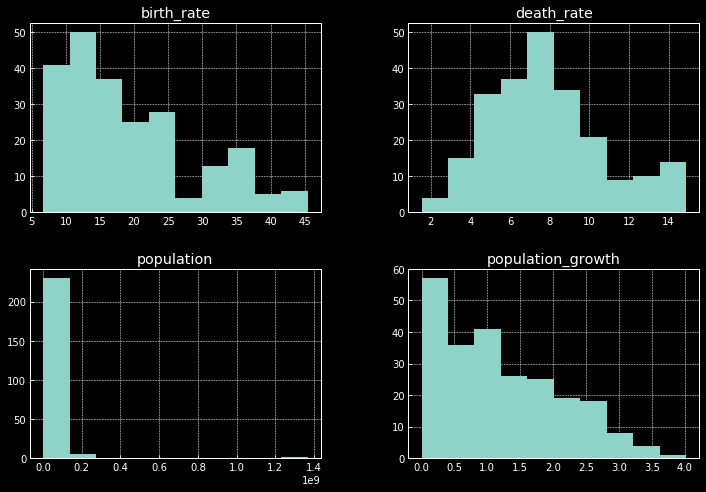

In [58]:
plt.style.use('dark_background')
hist_df.hist(figsize = (12,8))

In [59]:
ls

Project Analyzing Data from the CIA Factbook Database USING SQLite and Pandas.ipynb
factbook.db
